<a href="https://colab.research.google.com/github/s372718/IIV_Uebung_PM/blob/main/%C3%9Cbung_Process_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# only 4 anaconda users
# for our project we need to install some packages
# in a lokal IDE  this must be done via console or the anaconda package manager

#Windows
  # install https://support.microsoft.com/en-us/help/2977003/the-latest-supported-visual-c-downloads 
  # insall https://visualstudio.microsoft.com/de/thank-you-downloading-visual-studio/?sku=Community&rel=15
  # pip install pm4py  
  # pip install graphviz
  # pip install pm4pybpmn
  # pip install pygraphviz

#mac
  # pip install pm4py
  # python -c "import pm4py"
  # pip install graphviz
  # pip install pm4pybpmn
  # pip install pygraphviz


#linux
  # g++ -v
  # apt-get install graphviz
  # pip install pm4py
  # pip install graphviz
  # pip install pm4pybpmn
  # pip install pygraphviz


In [ ]:
#import von Libs für COLAB
if 'google.colab' in str(get_ipython()):
  !pip install pm4py
  !apt-get install graphviz
  #!pip install graphviz
  #!apt-get install python3-tk
  #!apt install libblas-dev
  #!apt install liblapack-dev
  #!apt install libsuitesparse-dev


from IPython.display import Image

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stringdist: filename=StringDist-1.0.9-cp38-cp38-linux_x86_64.whl size=24939 sha256=09c8f2ffbf6e855bf1b33af9ff2beaedaf2232be6d0d00dcb5a42f7d12c94037
  Stored in directory: /root/.cache/pip/wheels/7a/64/e2/16f6a25a62a78f951c1715adb24ba2271ae9d7872f42378c3a
Successfully built stringdist
Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.42.2-3build2).
0 upgraded, 0 newly installed, 0 to remove and 23 not upgraded.


# Process Mining

Was Process Mining ist, sollten Sie aus der Vorlesung und der einführenden Lecture bereits mitgenommen haben.
Im Folgenden beschäftigen wir uns mit der technischen Seite der Grundlagen des Process Mining, den Daten und Algorithmen hinter dem Buzzword. Um einen tieferen Einblick in die Thematik zu gewährleisten, wollen wir im Folgenden ein Verständnis für Event Logs, gängige Process Discovery Algorithmen und Darstellungsformen vermitteln.

## 1. Das Eventlog

Wie bereits dargestellt bilden Eventlogs die Grundlage für Process Mining. Eventlogs liegen in betrieblichen Anwendungssystemen (BAS wie z. B. ERP / CRM / etc.) oft gar nicht in der Form vor in der man diese für Process Mining eigentlich benötigt. Meist müssen die Eventlogs erst aus Datenbankeinträgen der IT-Systeme rekonstruiert werden. Diese Rekonstruktion ist oft kein simples Unterfangen, da Syntax, Semantik und Fremdschlüssel verschiedener Tabellen in einer Datenbank komplexe Beziehungen abbilden.

Process Mining Lösungen wie die der Firma Celonis, welche in Deutschland als innovatives Einhorn der IT für ihre Process Mining Lösung bekannt geworden ist, bieten fertige Extraktoren. Diese ermöglichen eine technische Anbindung an die Systeme und eine automatisierte Erstellung von Event logs aus den Tabellen der Datenbank. Wie man sich aber unschwer vorstellen kann, ist die Richtigkeit der automatisch extrahierten Logs daran gebunden, dass Unternehmen den vom IT-Systemherstellern entwickelten Standardprozess im BAS adaptiert haben. Anpassungen am Prozess oder der BAS können zu Abweichungen führen, wodurch auch Extraktoren angepasst werden müssen.
<img src="https://github.com/JMU-BWL6/IIV_2020_PM/blob/main/1.png?raw=1">
Zur Vereinfachung, wird die Rekonstruktion und der Export solcher Eventlogs vernachlässigt. Im Folgenden wird deswegen davon ausgegangen, dass ein Eventlog in Form einer Datei bereits extrahiert wurde.

Allgemein kann sich das Eventlog als eine Tabelle (siehe unten) vorgestellt werden, in der die Aktivitäten die im IT-System von Nutzern ausgeführt wurden Fallbezogen und mit einem Zeitstempel zusammen gespeichert werden. Dabei können auch weitere Daten miteinbezogen werden, um wie im Beispiel, z.B. Kosten anzugeben und die Person abzubilden, welche die Aktivität durchgeführt hat.

|Case ID	| Event ID | dd-MM-yyyy:HH.mm |	Activity | Resource | Costs |
| :--- | :--- | :--- | :--- | :--- | :--- |
| 1 | 35654423	| 30-12-2010:11.02	| register request	| Pete	| 50 |
| 1 | 35654424	| 31-12-2010:10.06	| examine thoroughly	| Sue	| 400 | 
| 1 | 35654425	| 05-01-2011:15.12	| check ticket	| Mike	| 100 | 
| 2 | 35654426	| 06-01-2011:11.18	| decide	| Sara	| 200| 
| 2 | 35654427	| 07-01-2011:14.24	| reject request	| Pete	| 200| 


### 1.1 Eventlog Formate

Event Logs können in unterschiedlichen Dateiformaten vorliegen. Typische Dateiformate sind CSV, XML und XES.
Während CSV dem Beispiel der Tabelle oben nahe kommt, und die Minimalform darstellt, bilden XML und XES komplexere Formate ab, in denen die Daten gruppiert und gegliedert gespeichert werden können. IEEE XES ist auf XML basierendes Standardformat, das beschreibt, wie Ereignisprotokolle gespeichert werden und syntaktische regeln vorschreibt. Weitere Informationen über das Format können Sie auf der IEEE XES-Website finden (http://www.xes-standard.org/). Folgende Abbildung zeigt ein Beispiel einer XES-Datei.

<img src="https://github.com/JMU-BWL6/IIV_2020_PM/blob/main/2.png?raw=1">



### 1.2 Event log laden

In diesem Abschnitt werden Informationen über das Importieren und Exportieren von Event Logs, die in verschiedenen Datenformaten gespeichert sind, vorgestellt. Bevor wir in die Einzelheiten des Imports und Exports verschiedener Arten von Dateien mit Ereignisdaten eintauchen, erläutern wir zunächst kurz die beiden grundlegenden Begriffe von Eventlogs. Wir gehen davon aus, dass der Leser mit dem allgemeinen Konzept eines Eventlogs vertraut ist. Im Allgemeinen unterscheiden wir zwischen zwei verschiedenen Objekttypen von Ereignisdaten:

- Event Streams (objects.log.log.EventStream); Stellen einfach eine Abfolge von Ereignissen dar. Die Ereignisse selbst sind einfach eine Erweiterung der Mapping-Klasse von python (collections.abc.mapping), die es erlaubt, Ereignisse als Diktat zu verwenden. Aus der Sicht der Programmierung verhält sich ein Ereignisstrom genau wie ein Listenobjekt in Python. Bei der Anwendung von Lambda-Funktionen muss das Ergebnis jedoch explizit in ein EventStream-Objekt casted werden.


- Ein Event Log(objects.log.log.EventLog); Stellt eine Sequenz von Ereignisabläufen dar. Das Konzept eines Event Logs ist die traditionellere Sicht auf Ereignisdaten, d.h. die Ausführungen eines Prozesses werden in Schritten von Ereignissen, mit Zeitstempeln als Ordnung festgehalten. Auf diese Weise wird das Sortieren von Spuren nach einem bestimmten Sortierkriterium auf natürliche Weise unterstützt, und Lambda-Funktionen und Filter lassen sich problemlos auch auf Ereignisprotokolle anwenden.

Der Beispielcode zeigt, wie ein IEEE XES-File importiert wird. Das Codefragment verwendet den Standard-Importer. Beachten Sie, dass IEEE XES-Ereignisprotokolle in ein Ereignisprotokoll-Objekt (objects.log.log.Eventlog) importiert werden.
Durch den importer wird das file in ein Python dict object überführt (https://docs.python.org/3/tutorial/datastructures.html#dictionaries). Durch den Zusatz TIMESTAMP_SORT in den Parametern wurde der Eventlog beim import entsprechend des Zeitstempels sortiert.

*wichtig: bei der Ausführung muss das .xes file im selben ordner liegen wie das Python-Notebook, andernfalls müsste der Pfad zur Datei spezifiziert werden.*

In [ ]:
#get & load LOG
!wget https://bitbucket.org/jmu-iiv-2020/iiv_2020_1/raw/fe305beff8605517f799474ccec9fd41598a6ffb/Hospital_log.xes

--2023-01-22 16:52:38--  https://bitbucket.org/jmu-iiv-2020/iiv_2020_1/raw/fe305beff8605517f799474ccec9fd41598a6ffb/Hospital_log.xes
Resolving bitbucket.org (bitbucket.org)... 18.205.93.0, 18.205.93.1, 18.205.93.2, ...
Connecting to bitbucket.org (bitbucket.org)|18.205.93.0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85363264 (81M) [text/plain]
Saving to: ‘Hospital_log.xes’

Hospital_log.xes    100%[===================>]  81.41M   111MB/s    in 0.7s    

2023-01-22 16:52:44 (111 MB/s) - ‘Hospital_log.xes’ saved [85363264/85363264]



In [ ]:
from pm4py.objects.log.importer.xes import importer as xes_importer
variant = xes_importer.Variants.ITERPARSE
parameters = {variant.value.Parameters.TIMESTAMP_SORT: True}
log = xes_importer.apply('Hospital_log.xes', variant=variant, parameters=parameters)


parsing log, completed traces ::   0%|          | 0/1143 [00:00<?, ?it/s]

In [ ]:
#download a second logfile
!wget https://raw.githubusercontent.com/JMU-BWL6/IIV_2020_PM/main/running-example.xes

--2021-12-15 11:06:12--  https://raw.githubusercontent.com/JMU-BWL6/IIV_2020_PM/main/running-example.xes
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15892 (16K) [text/plain]
Saving to: ‘running-example.xes’

running-example.xes 100%[===================>]  15.52K  --.-KB/s    in 0s      

2021-12-15 11:06:12 (84.4 MB/s) - ‘running-example.xes’ saved [15892/15892]



In [ ]:
#load the second logfile
from pm4py.objects.log.importer.xes import importer as xes_importer
variant = xes_importer.Variants.ITERPARSE
parameters = {variant.value.Parameters.TIMESTAMP_SORT: True}
log1 = xes_importer.apply('running-example.xes', variant=variant, parameters=parameters)



parsing log, completed traces ::   0%|          | 0/6 [00:00<?, ?it/s]

Nach der Ausführung solten 1143 von 1143 aktivitäten aus dem Eventlog extrahiert worden sein.

### 1.3 Exploration

Nach dem Einlesen wollen wir uns ein Event im Eventlog anschauen. Um uns den neuesten Eintrag im Eventlog ausgeben zulassen, muss aufgrund der Sortierung beim Import, der erste Eintrag gelesen werden.

*wichtig: Programmiersprachen wie python starten beim Zählen immer bei 0 ;)*

In [ ]:
print(log[0][0])

{'org:group': 'Radiotherapy', 'Number of executions': 1, 'Specialism code': 61, 'concept:name': '1e consult poliklinisch', 'Producer code': 'SRTH', 'Section': 'Section 5', 'Activity code': 410100, 'time:timestamp': datetime.datetime(2005, 1, 3, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'lifecycle:transition': 'complete'}


Wollen wir die erste Aktivität anschauen, muss entsprechend das letzte Event ausgegeben werden.

In [ ]:
print(log[1142][0])

{'org:group': 'General Lab Clinical Chemistry', 'Number of executions': 1, 'Specialism code': 86, 'concept:name': 'aanname laboratoriumonderzoek', 'Producer code': 'CRLA', 'Section': 'Section 4', 'Activity code': 370000, 'time:timestamp': datetime.datetime(2008, 3, 20, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'lifecycle:transition': 'complete'}


### 1.4 Suchen / Filtern von Event Daten 

Grundsätzlich ist auch das Verändern des Eventlogs möglich. Bspw., um unsaubere Daten zu entfernen oder Zeiten auszuschließen. Folgender Code entfernt alle Timestamps außerhalb des Jahres 2007 und 2008.

In [ ]:
from pm4py.algo.filtering.log.timestamp import timestamp_filter
log_filtered = timestamp_filter.filter_traces_contained(log, "2007-01-01 00:00:00", "2008-12-31 23:59:59")

In [ ]:
len(log_filtered)

261

Nach dem filtern sind nur noch 261 Events im Log.

In [ ]:
print(log_filtered[260][0])

{'org:group': 'General Lab Clinical Chemistry', 'Number of executions': 1, 'Specialism code': 86, 'concept:name': 'aanname laboratoriumonderzoek', 'Producer code': 'CRLA', 'Section': 'Section 4', 'Activity code': 370000, 'time:timestamp': datetime.datetime(2008, 3, 20, 0, 0, tzinfo=datetime.timezone(datetime.timedelta(seconds=3600))), 'lifecycle:transition': 'complete'}


## 2. Process Discovery

***Process Discovery-Algorithmen*** sollen ein geeignetes Prozessmodell aus den Daten erstellen, das die Reihenfolge der Ereignisse/Aktivitäten beschreibt, die während einer Prozessausführung ausgeführt wurden.

Folgende Übersicht bietet einen Überblick über verschiedene Process Mining Algorithmen die der Process Discovery dienen.


| Alpha | Alpha+ | Heuristic | Inductive |
| :--- | :--- | :--- | :--- |
| Kann keine Schleifen der Länge eins und zwei handhaben | Kann keine Schleifen der Länge eins und zwei handhaben | Berücksichtigt die Häufigkeit | Kann mit unsichtbaren Aufgaben umgehen |
| Unsichtbare und doppelte Aufgaben können nicht entdeckt werden |  Unsichtbare und doppelte Aufgaben können nicht entdeckt werden | Erkennt kurze Schleifen | Modell ist solide |
|Entdecktes Modell ist möglicherweise nicht ausgereift | Entdecktes Modell ist möglicherweise nicht ausgereift | Garantiert kein fundiertes Modell | Meist verwendeter Algorithmus zur Prozessanalyse
| Schwach gegen fehler im Log | Schwach gegen fehler im Log |    |

### 2.1 Flow graph

In diesem Abschnitt werden Directly-Follows-Diagramme, vorgestellt. Directly-Follows-Diagramme sind Graphen, bei denen die Knoten die Ereignisse/Aktivitäten im Protokoll repräsentieren und gerichtete Kanten zwischen den Knoten vorhanden sind, wenn mindestens eine Spur im Protokoll vorhanden ist, bei der dem Quellereignis/der Quellaktivität das Zielereignis/die Zielaktivität folgt. Über diese gerichteten Kanten hinaus ist es einfach, Metriken wie die Häufigkeit (Zählen, wie oft dem Quellereignis/der Quellaktivität das Zielereignis/die Zielaktivität folgt) oder die Performance (eine gewisse Aggregation, z.B. der Mittelwert der zwischen den beiden Ereignissen/Aktivitäten verstrichenen Zeit) darzustellen.

Zuerst wir das Directly-Follows-Diagramm aus dem oben bereits genutzten Eventlog extrahiert. Zusätzlich wird Code zur Visualisierung des Directly-Follows-Graphen zur Verfügung gestellt. Diese Visualisierung ist eine farbige Darstellung des Directly-Follows-Diagramms, die mit der Häufigkeit der Aktivitäten dekoriert ist.

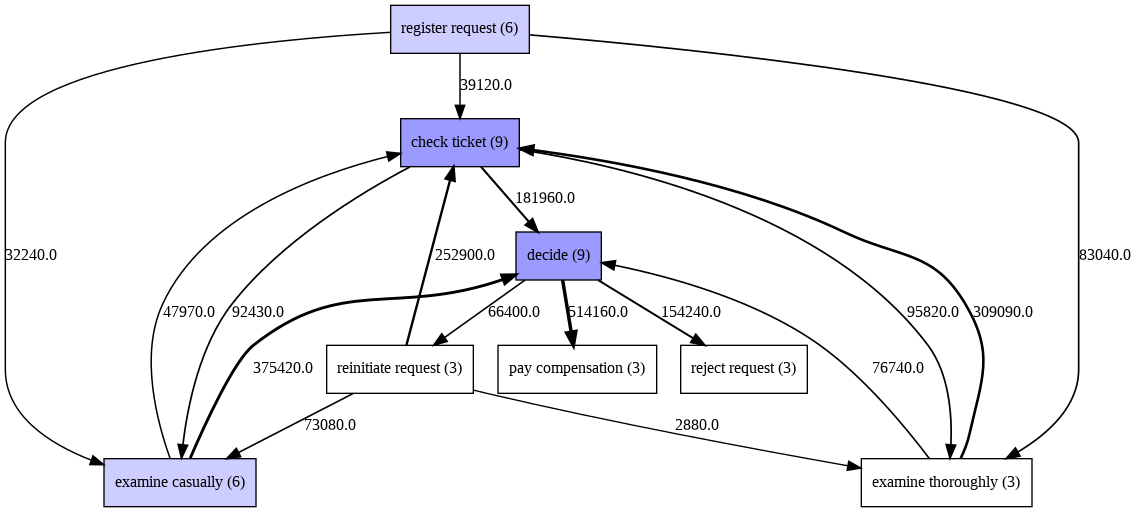

In [ ]:
#Import benötigter Bibliotheken
from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualization

#Flow Graph erzeugen 
dfg = dfg_discovery.apply(log1, variant=dfg_discovery.Variants.PERFORMANCE)

#Export als PNG
parameters = {dfg_visualization.Variants.PERFORMANCE.value.Parameters.FORMAT: "png"}
gviz = dfg_visualization.apply(dfg, log=log1, variant=dfg_visualization.Variants.PERFORMANCE, parameters=parameters)
dfg_visualization.save(gviz, "1_log1.png")

#Visualisierung im Jupyter Notebook
gviz = dfg_visualization.apply(dfg, log=log1, variant=dfg_visualization.Variants.FREQUENCY)
dfg_visualization.view(gviz)



### 2.2 Heurisiken

Der Heuristics Miner ist ein Algorithmus, der auf den Directly-Follows-Graphen basiert und einen Weg bietet, mit Rauschen umzugehen und gemeinsame Konstrukte (also Abhängigkeit zwischen zwei Aktivitäten) zu finden. Die Ausgabe des Heuristics Miner ist ein heuristisches Netz, also ein Objekt, das die Aktivitäten und die Beziehungen zwischen ihnen enthält. Das Heuristiknetz kann dann in ein Petrinetz umgewandelt werden.
entwicklet wurde der Algorithmus um die Forschungsgruppe von Wil van der Aalst (https://pdfs.semanticscholar.org/1cc3/d62e27365b8d7ed6ce93b41c193d0559d086.pdf)

In [ ]:
#import benötigter Bibliotheken
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

#Heuristisches Netz generieren
heu_net = heuristics_miner.apply_heu(log, parameters={heuristics_miner.Variants.CLASSIC.value.Parameters.DEPENDENCY_THRESH: 0.99})


In [ ]:
#Export als PNG
parameters = {dfg_visualization.Variants.PERFORMANCE.value.Parameters.FORMAT: "png"}
gviz = hn_visualizer.apply(heu_net , parameters=parameters)
hn_visualizer.save(gviz, "2_heu_net.png")

#Visualisierung im Jupyter Notebook
hn_visualizer.view(gviz)

#warnung "Warning: # is not a known color." kann ignoriert werden

*Hinweis:* 
Die Ausgabe kann mit einem Doppelklick vergrößert werden. Außerdem erfolgt die Ausgabe zusätzlich als Datei im Dateipfad, in dem auch das Jupyter Notebook gespeichert ist.

### 2.3 IMDF

IMDFc ist eine spezifische Implementierung des Inductive Miner Directly Follows-Algorithmus (http://www.processmining.org/_media/blogs/pub2015/bpmds_directly-follows_mining.pdf), die darauf abzielt, ein solides Workflow-Netz mit guten Fitnesswerten (in den meisten Fällen zur Gewährleistung einer perfekten Wiedergabetauglichkeit) zu konstruieren. Die Grundidee von Inductive Miner besteht darin, einen "Schnitt" im Protokoll zu erkennen (z.B. sequenzieller Schnitt, paralleler Schnitt, gleichzeitiger Schnitt und Schleifenschnitt) und dann in Unterprotokollen, die bei der Anwendung des Schnitts gefunden wurden, solange zu wiederholen, bis ein Basisfall gefunden wird. Die Directly-Follows-Variante vermeidet die Rekursion in den Unterprotokollen, verwendet aber den Directly-Follows-Graphen.

Bevor wir loslegen wollen wir uns allerdings ein neues Beispiel aus einem Eventlog importieren.

Im folgenden wird erst der Entscheidungsbaum und dann der Workflow Graph aufgebaut.

In [ ]:
#Import von IDMF Bibiliotheken für Process Trees
import os
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.process_tree import visualizer as pt_visualizer

In [ ]:
#Process Tree mittels IMDF generieren
tree = inductive_miner.apply_tree(log1)

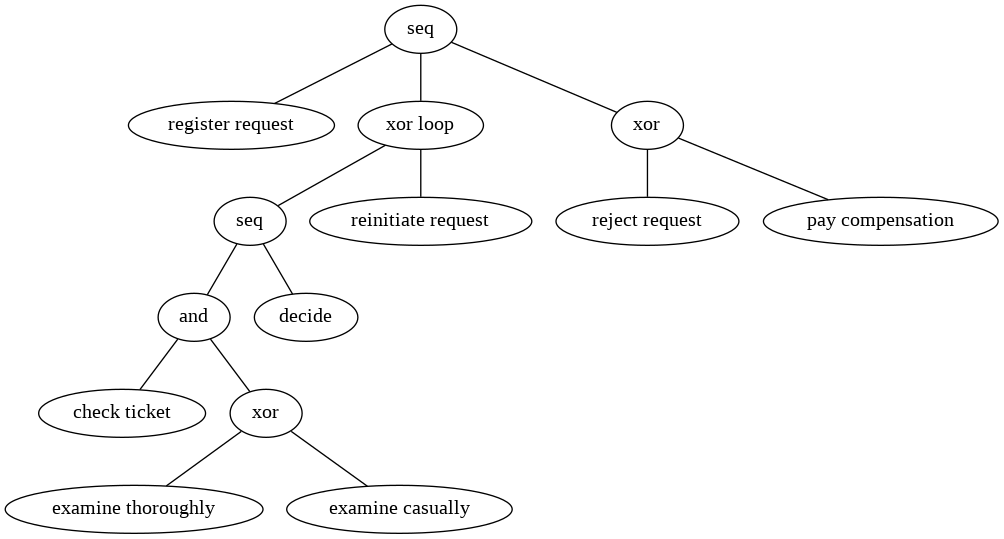

In [ ]:
#Ausgabe des Tree im Jupyter Notebook
gviz = pt_visualizer.apply(tree)
pt_visualizer.view(gviz)

#Export in Datei
parameters = {dfg_visualization.Variants.PERFORMANCE.value.Parameters.FORMAT: "svg"}
gviz = pt_visualizer.apply(tree, parameters=parameters)
pt_visualizer.save(gviz, "3_imdf_tree.svg")

#Warnings can be ignored

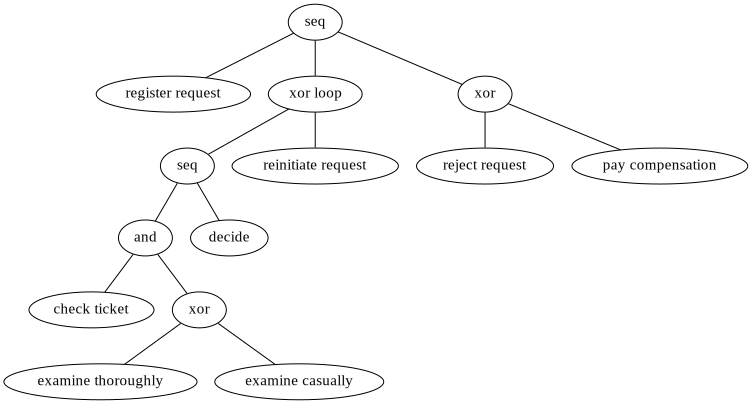

In [ ]:
# Ausgabe nur für colab relevant / ausführen
from IPython.display import SVG, display
display(SVG('3_imdf_tree.svg'))


In [ ]:
#Import von IDMF Bibiliotheken für Petrienetz
import os
from pm4py.algo.discovery.inductive import algorithm as inductive_miner
from pm4py.visualization.petrinet import visualizer as pn_visualizer


/usr/local/lib/python3.7/dist-packages/pm4py/visualization/petrinet/__init__.py:20: UserWarning: please use the pm4py.visualization.petri_net package instead
  warnings.warn("please use the pm4py.visualization.petri_net package instead")


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecatedWarning: apply is deprecated as of 2.2.5 and will be removed in 3.0.0. please use pm4py.visualization.petri_net.algorithm instead
  """


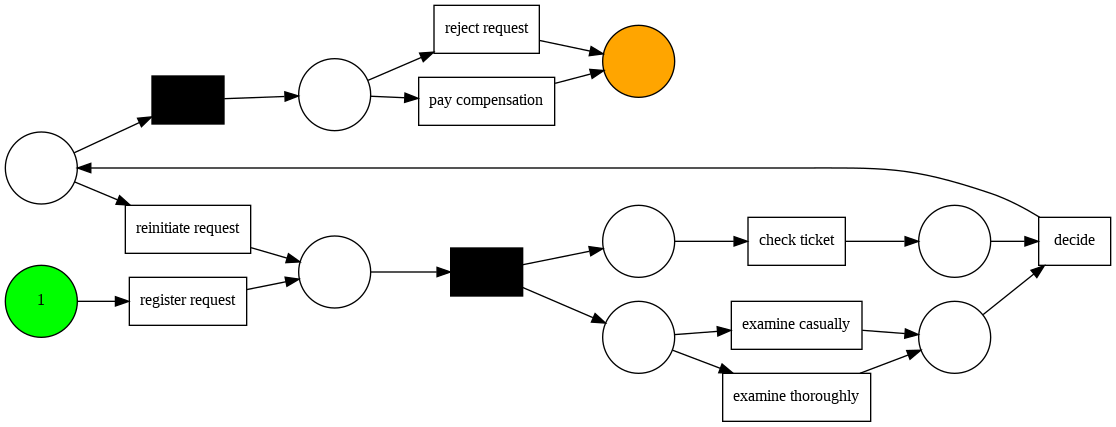

In [ ]:
#netz erzeugen
net, initial_marking, final_marking = inductive_miner.apply(log1)
#Ausgabe des Net im Jupyter Notebook
from pm4py.visualization.petrinet import visualizer as pn_visualizer
gviz = pn_visualizer.apply(net, initial_marking, final_marking)
pn_visualizer.view(gviz)

#Export in Datei
pn_visualizer.save(gviz, "4_imdf_petri.png")

## 3. Fazit

Mit den Angeführten Beispielen, wurde die verarbeitung von Eventslogs im Bereich des Process Mining, gängige Darstellungsformen sowie verbreitete Process Discovery Algorithmen demonstriert. Falls euch das Thema interessiert kann natürlich selbst ausprobiert werden, über die Quellen findet ihr alles nötige dazu. Viel Spaß!

##  Quellen
1. https://pm4py.fit.fraunhofer.de/documentation
2. https://data.4tu.nl/
3. http://www.processmining.org/_media/blogs/pub2015/bpmds_directly-follows_mining.pdf
4. https://pdfs.semanticscholar.org/1cc3/d62e27365b8d7ed6ce93b41c193d0559d086.pdf

## License

MIT License

Copyright (c) 2020 Fabian Gwinner - Julius-Maximilians-Universität Würzburg.

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

https://opensource.org/licenses/mit-license.php

Used Libraries are excluded und underlay their own Licenses